## Esercizio 11.1


Riporto l'esercizio inziale presenta nel jupyter dell' esercitazione e poi modifico alcuni parametri per capire i limiti e le possibilità di questo approccio, che in questo caso utilizzo per effettuare un fit di dati che seguono un andamento lineare.

Inizio quindi con il creare un set di punti (x,y) che seguono un andamento lineare con coefficiente angolare $m=2$ intercetta $b=1$ e un rumore $\sigma$ inizialmente nullo che poi andrò a modificare. Con questo set di 500 punti allenerò la rete e la validerò con un set ugualmente creato ma più ridotto con 50 punti. Quest ultimi sono altri paramteri che modificheò per vedere che effetto hanno sulla rete.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

m = 2 
b = 1 

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500) #alleno il modello con 500 punti
x_valid = np.random.uniform(-1, 1, 50) #valido il modello con 50 punti
x_valid.sort()
y_target = m * x_valid + b # questa è la retta ideale, il target

sigma = 0.0 # Setto inizialmente il rumore dei punti a zero
y_train = np.random.normal(m * x_train + b, sigma) #i punti con i quali alleno il modello e ricamo m e b
y_valid = np.random.normal(m * x_valid + b, sigma)



Creo il modello utilizzando un layer con un neurone di dimensione uno (uno scalare) e lo compilo utilizzando come ottimizzatore un gradiente di discesa stocastico, come funzione e metrica lo scarto quadratico medio MSE:


$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

dove $\{y_j^{pred}\}$ sono i punti predetti dalla rete e $\{y_j\}$ sono i valori veri, ovvero quelli sui quale alleno il modello. $N_{test}$ è il numero di punti con i quali la rete apprende, nel mio caso 500.



In [2]:
#Creo il modello
model = tf.keras.Sequential() #sequenziale
model.add(Dense(1, input_shape=(1,))) #uno strato con un neurone di forma uno, quindi un numero

#compilo il modello
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #stochastic gradien descend, mean square-error loss, mean square-error loss metric.

#sommario
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Alleno ora il modello utilizzando batches di 32 punti e 30 epoche. Lo shuffle serve per rimescolare i dati all'inizio di ogni epoca, in modo che ogni volta i dati vengano suddivisi nei batches in modo diverso.

In [3]:
history = model.fit(x=x_train,y=y_train, batch_size=32, 
                    epochs=30,shuffle=True,validation_data=(x_valid,y_valid))

Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 1s 2ms/sample - loss: 1.4846 - mse: 1.4846 - val_loss: 1.0446 - val_mse: 1.0446
Epoch 2/30
500/500 [==============================] - 0s 266us/sample - loss: 0.9915 - mse: 0.9915 - val_loss: 0.7096 - val_mse: 0.7096
Epoch 3/30
500/500 [==============================] - 0s 227us/sample - loss: 0.6885 - mse: 0.6885 - val_loss: 0.5061 - val_mse: 0.5061
Epoch 4/30
500/500 [==============================] - 0s 213us/sample - loss: 0.4978 - mse: 0.4978 - val_loss: 0.3733 - val_mse: 0.3733
Epoch 5/30
500/500 [==============================] - 0s 217us/sample - loss: 0.3702 - mse: 0.3702 - val_loss: 0.2824 - val_mse: 0.2824
Epoch 6/30
500/500 [==============================] - 0s 245us/sample - loss: 0.2811 - mse: 0.2811 - val_loss: 0.2194 - val_mse: 0.2194
Epoch 7/30
500/500 [==============================] - 0s 233us/sample - loss: 0.2186 - mse: 0.2186 - val_loss: 0.1725 - val_mse: 0.1725
Epoch

In [4]:
model.get_weights() #Questo da il peso e il bias che in questo caso sono m e b.

[array([[1.9410412]], dtype=float32), array([0.9992259], dtype=float32)]

La rete è allenata ore la valuto misurando la funzione costo rispetto alla retta esatta y_target alla 32-esima epoca e plottando il suo andamento al variare delle epoche.

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

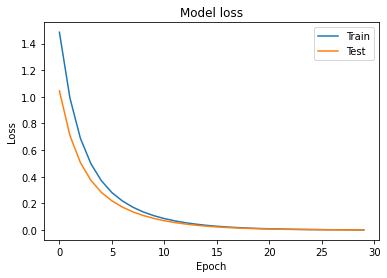

In [5]:

#valuto il modello con la curva esatta
score = model.evaluate(x_valid,y_target,batch_size=32,verbose=1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

#plotto la funzione costo in questo caso mean square error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

# print(history.history.keys()) #questo fa vedere le chiavi per accedere alla storia del modello


plt.show()

Quando ho accertato, guardando la funzione costo che la rete è effettivamente allenata, provo a predire dei dati sempre, per ora, rimanendo nell'intervallo $x \in (-1,1)$.

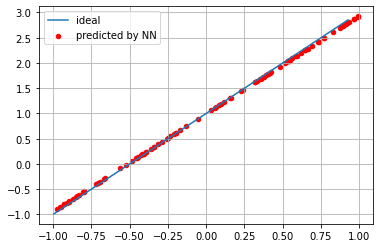

In [6]:
#Ora il modello è allenato posso predire nel seguente modo:
x_predicted = np.random.uniform(-1,1,100) #x dalle quali predirre le y.
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted,y_predicted,label='predicted by NN',c='r',s=20)
plt.plot(x_valid,y_target,label='ideal') #questa è la retta precisa 
plt.grid(True)
plt.legend()

plt.show()

Vediamo dal grafico che i dati seguono con ottimo accordo la retta esatta.

### Cambio di alcuni parametri del modello
I parametri che vorrei cambiare per vederne l'effetto sulla rete sono:
- Numero di epoche $N_{epochs}$
- Numero di punti con i quali alleno la rete $N_{train}$
- Il rumore dei punti sia per $(x,y)_{train}$ che per $(x,y)_{valid}$

vediamo come modificando questi numeri la rete migliora o peggiora la sua efficienza ed efficacia.

Do un valore al rumore dei punti $\sigma=0.5$ e plotto quelli di validazione per vedere che effettivamente si distribuiscono in un intorno della retta.

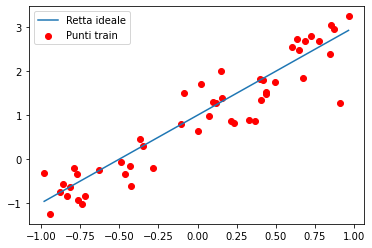

In [7]:
x_train = np.random.uniform(-1, 1, 500) #alleno il modello con 500 punti
x_valid = np.random.uniform(-1, 1, 50) #valido il modello con 50 punti
x_valid.sort()
y_target = m * x_valid + b # questa è la retta ideale, il target

sigma = 0.5 # Setto il rumore dei punti a 0.5
y_train = np.random.normal(m * x_train + b, sigma) #i punti con i quali alleno il modello e ricamo m e b
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid,y_target,label='Retta ideale')
plt.scatter(x_valid,y_valid,label='Punti train',c='red')
plt.legend()
plt.show()

vediamo se è cambiato qualcosa per la rete:

In [8]:
#creo il modello
model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,))) 

#compilo
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#alleno
history = model.fit(x=x_train,y=y_train, batch_size=32,
                    epochs=30,shuffle=True,validation_data=(x_valid,y_valid))

#valuto il modello con la curva esatta
score = model.evaluate(x_valid,y_target,batch_size=32,verbose=1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

#predico
x_predicted = np.random.uniform(-1,1,100) #x dalle quali predirre le y.
y_predicted = model.predict(x_predicted)

Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 1s 2ms/sample - loss: 5.3425 - mse: 5.3425 - val_loss: 4.3936 - val_mse: 4.3936
Epoch 2/30
500/500 [==============================] - 0s 414us/sample - loss: 4.0415 - mse: 4.0415 - val_loss: 3.3914 - val_mse: 3.3914
Epoch 3/30
500/500 [==============================] - 0s 394us/sample - loss: 3.1412 - mse: 3.1412 - val_loss: 2.6622 - val_mse: 2.6622
Epoch 4/30
500/500 [==============================] - 0s 517us/sample - loss: 2.4777 - mse: 2.4777 - val_loss: 2.1258 - val_mse: 2.1258
Epoch 5/30
500/500 [==============================] - 0s 409us/sample - loss: 1.9886 - mse: 1.9886 - val_loss: 1.7205 - val_mse: 1.7205
Epoch 6/30
500/500 [==============================] - 0s 419us/sample - loss: 1.6174 - mse: 1.6174 - val_loss: 1.4078 - val_mse: 1.4078
Epoch 7/30
500/500 [==============================] - 0s 374us/sample - loss: 1.3298 - mse: 1.3298 - val_loss: 1.1633 - val_mse: 1.1633
Epoch

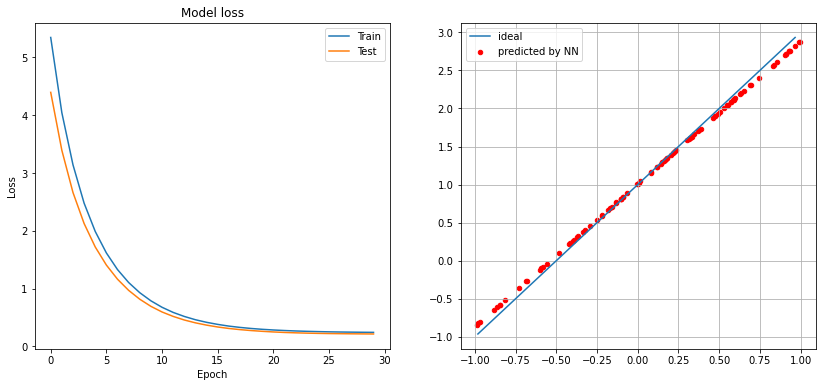

In [9]:
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#plotto la funzione costo in questo caso mean square error
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

#plotto i punti predetti con la retta esatta
ax2.scatter(x_predicted,y_predicted,label='predicted by NN',c='r',s=20)
ax2.plot(x_valid,y_target,label='ideal') #questa è la retta precisa 
ax2.grid(True)
ax2.legend()

plt.show()

Quello che cambia è che la funzione costo con dati con $\sigma=0.5$ non raggiunge gli stessi  valori (anche se comunque si avvicina molto allo zero) che aveva con i dati senza rumore, ma allo stesso tempo posso affermare che 30 epoche sembrano sufficienti ad allenare la rete come mostrato dal grafico dei punti predetti, che vanno in ottimo accordo con l'andamento della retta. Provo ora ad aumentare le epoche del doppio e sicuramente la funzione costo e il potere predittivo della rete miglioreranno notevolmente.

In [10]:
x_train = np.random.uniform(-1, 1, 500) #alleno il modello con 500 punti
x_valid = np.random.uniform(-1, 1, 50) #valido il modello con 50 punti
x_valid.sort()
y_target = m * x_valid + b # questa è la retta ideale, il target

sigma = 0.5 # Setto il rumore dei punti a 0.5
y_train = np.random.normal(m * x_train + b, sigma) #i punti con i quali alleno il modello e ricamo m e b
y_valid = np.random.normal(m * x_valid + b, sigma)

#creo il modello
model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,))) 

#compilo
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#alleno
history = model.fit(x=x_train,y=y_train, batch_size=32,
                    epochs=60,shuffle=True,validation_data=(x_valid,y_valid))

#valuto il modello con la curva esatta
score = model.evaluate(x_valid,y_target,batch_size=32,verbose=1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

#predico
x_predicted = np.random.uniform(-1,1,100) #x dalle quali predirre le y.
y_predicted = model.predict(x_predicted)

Train on 500 samples, validate on 50 samples
Epoch 1/60
500/500 [==============================] - 1s 3ms/sample - loss: 0.9745 - mse: 0.9745 - val_loss: 0.8002 - val_mse: 0.8002
Epoch 2/60
500/500 [==============================] - 0s 404us/sample - loss: 0.6330 - mse: 0.6330 - val_loss: 0.5719 - val_mse: 0.5719
Epoch 3/60
500/500 [==============================] - 0s 205us/sample - loss: 0.4505 - mse: 0.4505 - val_loss: 0.4500 - val_mse: 0.4500
Epoch 4/60
500/500 [==============================] - 0s 195us/sample - loss: 0.3513 - mse: 0.3513 - val_loss: 0.3871 - val_mse: 0.3871
Epoch 5/60
500/500 [==============================] - 0s 228us/sample - loss: 0.2983 - mse: 0.2983 - val_loss: 0.3545 - val_mse: 0.3545
Epoch 6/60
500/500 [==============================] - 0s 303us/sample - loss: 0.2691 - mse: 0.2691 - val_loss: 0.3369 - val_mse: 0.3369
Epoch 7/60
500/500 [==============================] - 0s 201us/sample - loss: 0.2520 - mse: 0.2520 - val_loss: 0.3273 - val_mse: 0.3273
Epoch

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

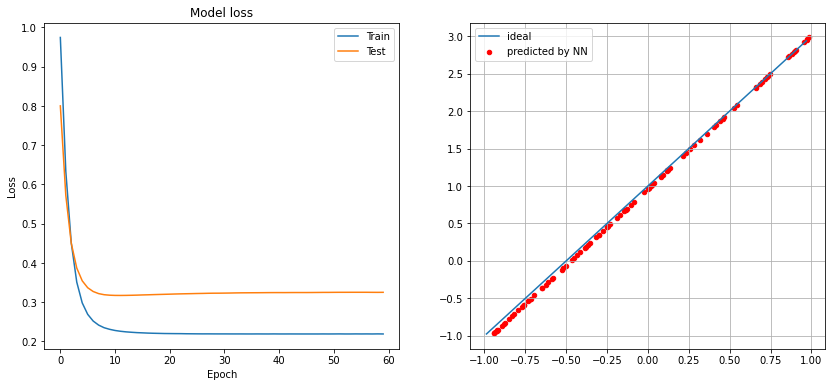

In [11]:
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#plotto la funzione costo in questo caso mean square error
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

#plotto i punti predetti con la retta esatta
ax2.scatter(x_predicted,y_predicted,label='predicted by NN',c='r',s=20)
ax2.plot(x_valid,y_target,label='ideal') #questa è la retta precisa 
ax2.grid(True)
ax2.legend()

plt.show()

Effettivamente aumentando il numero delle epoche, la funzione costo raggiunge valori più prossimo allo zero (60 sono eccessive, già dopo 40 epoche la funzione non diminuisce più) e anche la predittività è migliorata lo si vede nel grafico sulla destra dove i punti predetti sono ancora più vicini alla retta.

Infine vediamo come si può ultetriormente migliorare il comportamento della rete se si aumentano il numero di punti con i quali la si allena. Fisso $N_{train}=1000$

In [12]:
x_train = np.random.uniform(-1, 1, 1000) 
x_valid = np.random.uniform(-1, 1, 50) 
x_valid.sort()
y_target = m * x_valid + b 

y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)


#creo il modello
model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,))) 

#compilo
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#alleno
history = model.fit(x=x_train,y=y_train, batch_size=32,
                    epochs=60,shuffle=True,validation_data=(x_valid,y_valid))

#valuto il modello con la curva esatta
score = model.evaluate(x_valid,y_target,batch_size=32,verbose=1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

#predico
x_predicted = np.random.uniform(-1,1,100) #x dalle quali predirre le y.
y_predicted = model.predict(x_predicted)

Train on 1000 samples, validate on 50 samples
Epoch 1/60
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.0634 - mse: 4.0634 - val_loss: 2.4908 - val_mse: 2.4908
Epoch 2/60
1000/1000 [==============================] - 0s 229us/sample - loss: 2.6178 - mse: 2.6178 - val_loss: 1.6955 - val_mse: 1.6955
Epoch 3/60
1000/1000 [==============================] - 0s 219us/sample - loss: 1.7950 - mse: 1.7950 - val_loss: 1.2045 - val_mse: 1.2045
Epoch 4/60
1000/1000 [==============================] - 0s 213us/sample - loss: 1.2683 - mse: 1.2683 - val_loss: 0.8889 - val_mse: 0.8889
Epoch 5/60
1000/1000 [==============================] - 0s 184us/sample - loss: 0.9256 - mse: 0.9256 - val_loss: 0.6846 - val_mse: 0.6846
Epoch 6/60
1000/1000 [==============================] - 0s 224us/sample - loss: 0.7008 - mse: 0.7008 - val_loss: 0.5482 - val_mse: 0.5482
Epoch 7/60
1000/1000 [==============================] - 0s 179us/sample - loss: 0.5502 - mse: 0.5502 - val_loss: 0.4585 - val_ms

Epoch 60/60
50/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

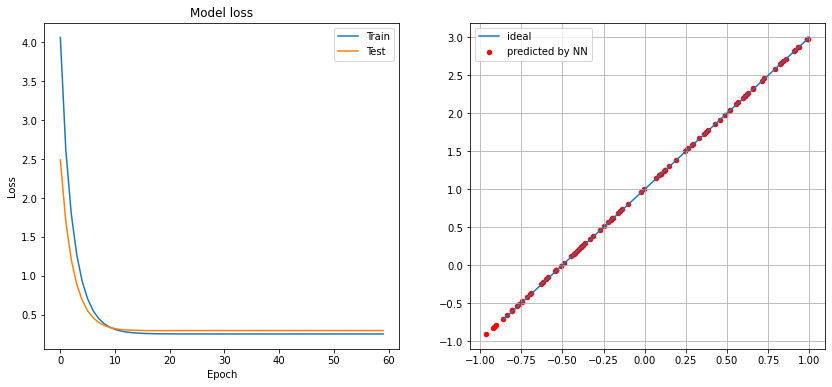

In [13]:
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#plotto la funzione costo in questo caso mean square error
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

#plotto i punti predetti con la retta esatta
ax2.scatter(x_predicted,y_predicted,label='predicted by NN',c='r',s=20)
ax2.plot(x_valid,y_target,label='ideal') #questa è la retta precisa 
ax2.grid(True)
ax2.legend()

plt.show()

Si Notano due cose:
1. Ho lasciato volutamente il numero di epoche a 60 per mettere in evidenza come sia migliorata l'efficenza del training della rete, infatti già dopo 10 epoche la funzione costo è praticamente zero e da lì in poi rimane costante (la rete non impara più).

2. La funzione costo Test è maggiore della Train. Questo è un normale comportamente dovuto al fatto che il Test sono dati che la rete non conosce, con i quali non ha ottimizzato i paramtri a differenza del Train. Quindi la funzione costo Test sarà sempre un po' peggiore.

In conclusione aumentando il numero di punti con i quali si allena la rete, il numero di epoche necessarie alla stessa per imparare si riduce notevolmente.